In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

<ipython-input-10-52ad8a786750>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [11]:
df = pd.read_csv("AAPL_5Y.csv").fillna(0)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-04-21,26.732500,26.732500,26.379999,26.4925,24.640911,126210000
1,2016-04-22,26.252501,26.620001,26.155001,26.4200,24.573479,134732400
2,2016-04-25,26.250000,26.412500,26.127501,26.2700,24.433960,112126400
3,2016-04-26,25.977501,26.325001,25.977501,26.0875,24.264212,224064800
4,2016-04-27,24.000000,24.677500,23.920000,24.4550,22.745811,458408400


In [30]:
predict_days = 180
train_data, test_data = df[0:-predict_days], df[-predict_days:]
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
predictions = list()
for i in range(len(test_ar)):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    predicted = output[0]
    predictions.append(predicted)
    obs = test_ar[i]
    history.append(predicted)
#     print(predicted, obs)
    if i % 10 == 0:
        print(i)
# error = mean_squared_error(test_ar, predictions)
# print('Testing Mean Squared Error: %.3f' % error)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170


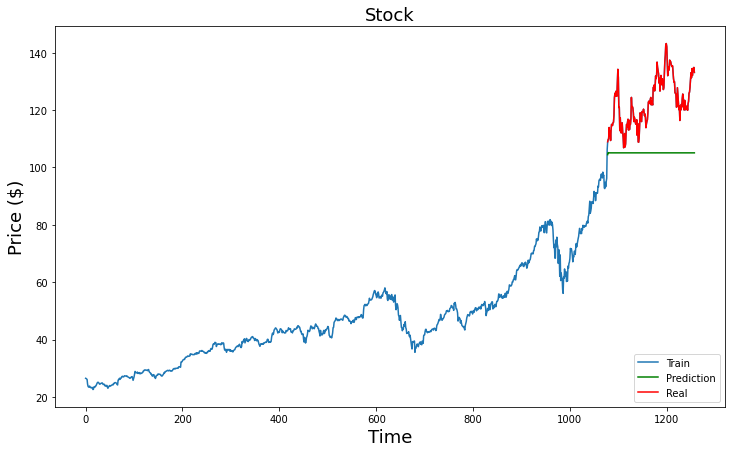

In [31]:
plt.figure(figsize=(12,7))
plt.plot(df['Close'])
plt.plot(test_data.index, predictions, color='green')
plt.plot(test_data.index, test_data['Close'], color='red')
plt.title('Stock', fontsize=18)
plt.xlabel('Time',fontsize=18)
plt.ylabel('Price ($)',fontsize=18)
plt.legend(['Train', 'Prediction', 'Real'], loc='lower right')